In [ ]:

from google.colab import drive
#Mount your google Drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import SimpleRNN, Dense
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers.experimental import RandomFourierFeatures
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#import f1_score
from sklrean.metrices import f1_score
#import recall_score
from sklrean.metrices import recall_score
#import precision_score
from sklrean.metrices import precision_score






In [ ]:


# Define the file paths to your CSV files in Google Drive
# Assuming the folder is named "ECGData" and located in the root directory
ecg_data_folder = '/content/drive/My Drive/ECG Data/'  # Modify this path if your folder is in a different location

# Define the file names
file_names = ['mitbih_test.csv', 'mitbih_train.csv']

# Initialize an empty dictionary to store DataFrames
dataframes = {}

# Read each CSV file into a DataFrame and store it in the dictionary
for file_name in file_names:
    file_path = ecg_data_folder + file_name
    df = pd.read_csv(file_path,header=None)
    dataframes[file_name] = df




In [ ]:
# Assuming you've already accessed the file paths as strings
normal_df = dataframes['mitbih_train.csv']  # Access the file path as a string
abnormal_df = dataframes['mitbih_test.csv']  # Access the file path as a string




normal_df.shape,abnormal_df.shape






((87554, 188), (21892, 188))

In [ ]:
normal_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [ ]:
ECG_df=pd.concat([normal_df,abnormal_df],axis=0)

In [ ]:
ECG_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [ ]:
ECG_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109446 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.8 MB


In [ ]:
ECG_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,...,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000
mean,0.891170,0.758909,0.424503,0.219602,0.201237,0.210298,0.205607,0.201617,0.198480,0.196610,...,0.004937,0.004568,0.004237,0.003914,0.003673,0.003469,0.003210,0.002956,0.002835,0.473439
std,0.239657,0.221190,0.227561,0.207248,0.177191,0.171965,0.178374,0.177020,0.171469,0.168028,...,0.043951,0.042109,0.040471,0.038801,0.037465,0.036552,0.035015,0.033413,0.032620,1.143232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922252,0.682648,0.251014,0.048853,0.082418,0.088300,0.073171,0.066093,0.064893,0.068615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991202,0.826560,0.430174,0.166355,0.147842,0.158640,0.145078,0.144465,0.150073,0.148849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910868,0.579832,0.342707,0.259045,0.287500,0.298343,0.295235,0.290623,0.283465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
ECG_df.shape

(109446, 188)

In [ ]:
ECG_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
ECG_df.duplicated().sum()

0

In [ ]:
ECG_df.drop_duplicates( keep="first", inplace=True)

In [ ]:
X=ECG_df.iloc[:,:186]
y=ECG_df.iloc[:,187]

In [ ]:
X=np.array(X)
mms=MinMaxScaler()
mms.fit(X)
mms.transform(X)
X=pd.DataFrame(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=30)

In [ ]:


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (87556, 186)
Shape of y_train: (87556,)


In [ ]:
# LSTM Model
# Convert DataFrame X to a NumPy array
X_array = X.values

# Convert Series y to a NumPy array
y_array = y.values

# Define the number of time steps and features
time_steps = X_array.shape[1]  # Number of time steps
num_features = 1  # Number of features per time step

# Define the number of classes (output categories)
num_classes = len(np.unique(y_array))

# Convert labels to one-hot encoding (categorical format)
y_encoded = keras.utils.to_categorical(y_array, num_classes)


# Reshape X to match the input shape expected by LSTM
X_reshaped = X_array.reshape(X_array.shape[0], time_steps, num_features)

# Define the LSTM model
model = keras.Sequential()
model.add(layers.LSTM(128, input_shape=(time_steps, num_features)))
model.add(layers.Dense(num_classes, activation='softmax'))
LSTM_pred = model.predict(X_test)
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# Train the model
LSTM=model.fit(X_reshaped, y_encoded, epochs=1, batch_size=32)


3421/3421 [==============================] - 735s 214ms/step - loss: 0.6568 - accuracy: 0.8277


In [ ]:

# Convert LSTM_pred to class labels (if it's in one-hot encoding format)
LSTM_pred_labels = np.argmax(LSTM_pred, axis=1)

# Compute precision for the LSTM model
precision_LSTM = precision_score(y_test, LSTM_pred_labels, average='weighted')

# Print the precision score
print(f"LSTM Precision: {precision_LSTM}")


LSTM Precision: 0.7449500757236779


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Convert LSTM_pred to class labels (if it's in one-hot encoding format)
LSTM_pred_labels = np.argmax(LSTM_pred, axis=1)

# Compute F1 score for the LSTM model
f1_LSTM = f1_score(y_test, LSTM_pred_labels, average='weighted')

# Print the F1 score
print(f"LSTM F1 Score: {f1_LSTM }")


LSTM F1 Score: 0.6672490340771822


In [ ]:
# Convert CNN_pred to class labels (if it's in one-hot encoding format)
LSTM_pred_labels = np.argmax(LSTM_pred, axis=1)

# Compute F1 score for the LSTM model
Recall_LSTM = recall_score(y_test, LSTM_pred_labels, average='weighted')

# Print the F1 score
print(f"LSTM Recall Score: {Recall_LSTM }")

LSTM Recall Score: 0.6046139789858382


In [ ]:
#MultiLayer Perceptron Model
# Convert DataFrame X to a NumPy array
X_array = X.values

# Convert Series y to a NumPy array
y_array = y.values

# Define the number of time steps and features
time_steps = X_array.shape[1]  # Number of time steps
num_features = 1  # Number of features per time step

# Define the number of classes (output categories)
num_classes = len(np.unique(y_array))

# Convert labels to one-hot encoding (categorical format)
y_encoded = keras.utils.to_categorical(y_array, num_classes)

# Reshape X to match the input shape expected by MLP
X_reshaped = X_array.reshape(X_array.shape[0], time_steps, num_features)

# Define the MLP model
mlp = keras.Sequential()
mlp.add(layers.Dense(128, input_shape=(time_steps, num_features)))
mlp.add(layers.Dense(num_classes, activation='softmax'))


# Compile the model
mlp.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
MLP=model.fit(X_reshaped, y_encoded, epochs=1, batch_size=32)

3421/3421 [==============================] - 172s 50ms/step - loss: 0.6691 - accuracy: 0.8255


In [ ]:
 MLP_pred = mlp.predict(X_test)

685/685 [==============================] - 2s 3ms/step


In [ ]:
#RNN Model
# Convert DataFrame X to a NumPy array
X_array = X.values

# Convert Series y to a NumPy array
y_array = y.values

# Define the number of time steps and features
time_steps = X_array.shape[1]  # Number of time steps
num_features = 1  # Number of features per time step

# Define the number of classes (output categories)
num_classes = len(np.unique(y_array))

# Convert labels to one-hot encoding (categorical format)
y_encoded = keras.utils.to_categorical(y_array, num_classes)

# Reshape X to match the input shape expected by RNN
X_reshaped = X_array.reshape(X_array.shape[0], time_steps, num_features)

# Define the RNN Model
rnn = keras.Sequential()
rnn.add(SimpleRNN(128, input_shape=(time_steps, num_features)))
rnn.add(layers.Dense(num_classes, activation='softmax'))
RNN_pred = rnn.predict(X_test)

# Compile the Model
rnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
RNN=model.fit(X_reshaped, y_encoded, epochs=1, batch_size=32)

3421/3421 [==============================] - 167s 49ms/step - loss: 0.6441 - accuracy: 0.8276


In [ ]:
 RNN_pred = rnn.predict(X_test)

685/685 [==============================] - 12s 17ms/step


In [ ]:
# Convert RNN_pred to class labels (if it's in one-hot encoding format)
RNN_pred_labels = np.argmax(RNN_pred, axis=1)

# Compute precision for the LSTM model
precision_rnn = precision_score(y_test, RNN_pred_labels, average='weighted')

# Print the precision score
print(f"RNN Precision: {precision_rnn}")

RNN Precision: 0.6934006447062941


In [ ]:
# Convert RNN_pred to class labels (if it's in one-hot encoding format)
RNN_pred_labels = np.argmax(RNN_pred, axis=1)

# Compute F1 score for the RNN model
f1_RNN = f1_score(y_test, RNN_pred_labels, average='weighted')

# Print the F1 score
print(f"RNN F1 Score: {f1_RNN }")

RNN F1 Score: 0.07683398883430823


In [ ]:
# Convert RNN_pred to class labels (if it's in one-hot encoding format)
RNN_pred_labels = np.argmax(RNN_pred, axis=1)

# Compute F1 score for the RNN model
Recall_RNN = recall_score(y_test, RNN_pred_labels, average='weighted')

# Print the F1 score
print(f"RNN Recall Score: {Recall_RNN }")

RNN Recall Score: 0.07820922795797168


In [ ]:
#CNN Model
# Convert DataFrame X to a NumPy array
X_array = X_train.values

# Convert Series y to a NumPy array
y_array = y_train.values

# Define the input shape (assuming your data has 3 features per time step)
input_shape = (time_steps, num_features)  # Adjust based on your data

# Define the number of classes (output categories)
num_classes = len(np.unique(y_array))

# Convert labels to one-hot encoding (categorical format)
y_encoded = keras.utils.to_categorical(y_array, num_classes)

# Define the CNN model
cnn = keras.Sequential()

# Add the input layer
cnn.add(layers.Input(shape=input_shape))

# Convolutional layers
cnn.add(layers.Conv1D(32, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPooling1D(pool_size=2))
cnn.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output
cnn.add(layers.Flatten())

# Fully connected layers
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(num_classes, activation='softmax'))
CNN_pred = cnn.predict(X_test)
#compile the CNN model
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# Train the CNN Model
cnn.fit(X_array, y_encoded, epochs=10, batch_size=32)


Epoch 1/10
2737/2737 [==============================] - 39s 14ms/step - loss: 0.1994 - accuracy: 0.9450
Epoch 2/10
2737/2737 [==============================] - 38s 14ms/step - loss: 0.1097 - accuracy: 0.9694
Epoch 3/10
2737/2737 [==============================] - 38s 14ms/step - loss: 0.0862 - accuracy: 0.9758
Epoch 4/10
2737/2737 [==============================] - 49s 18ms/step - loss: 0.0716 - accuracy: 0.9791
Epoch 5/10
2737/2737 [==============================] - 36s 13ms/step - loss: 0.0611 - accuracy: 0.9821
Epoch 6/10
2737/2737 [==============================] - 41s 15ms/step - loss: 0.0529 - accuracy: 0.9837
Epoch 7/10
2737/2737 [==============================] - 38s 14ms/step - loss: 0.0452 - accuracy: 0.9865
Epoch 8/10
2737/2737 [==============================] - 43s 16ms/step - loss: 0.0398 - accuracy: 0.9877
Epoch 9/10
2737/2737 [==============================] - 38s 14ms/step - loss: 0.0347 - accuracy: 0.9891
Epoch 10/10
2737/2737 [==============================] - 38s 14m

In [ ]:
 CNN_pred = cnn.predict(X_test)

685/685 [==============================] - 3s 4ms/step


In [ ]:
# Convert CNN_pred to class labels (if it's in one-hot encoding format)
CNN_pred_labels = np.argmax(CNN_pred, axis=1)

# Compute precision for the LSTM model
precision_CNN = precision_score(y_test, CNN_pred_labels, average='weighted')

# Print the precision score
print(f"CNN Precision: {precision_CNN}")

CNN Precision: 0.9805653799067277


In [ ]:
# Convert CNN_pred to class labels (if it's in one-hot encoding format)
CNN_pred_labels = np.argmax(CNN_pred, axis=1)

# Compute F1 score for the CNN model
f1_CNN = f1_score(y_test, CNN_pred_labels, average='weighted')

# Print the F1 score
print(f"CNN F1 Score: {f1_CNN }")

CNN F1 Score: 0.980453175470423


In [ ]:
# Convert CNN_pred to class labels (if it's in one-hot encoding format)
CNN_pred_labels = np.argmax(CNN_pred, axis=1)

# Compute F1 score for the CNN model
Recall_CNN = recall_score(y_test, CNN_pred_labels, average='weighted')

# Print the F1 score
print(f"CNN Recall Score: {Recall_CNN }")

CNN Recall Score: 0.9810415714938328


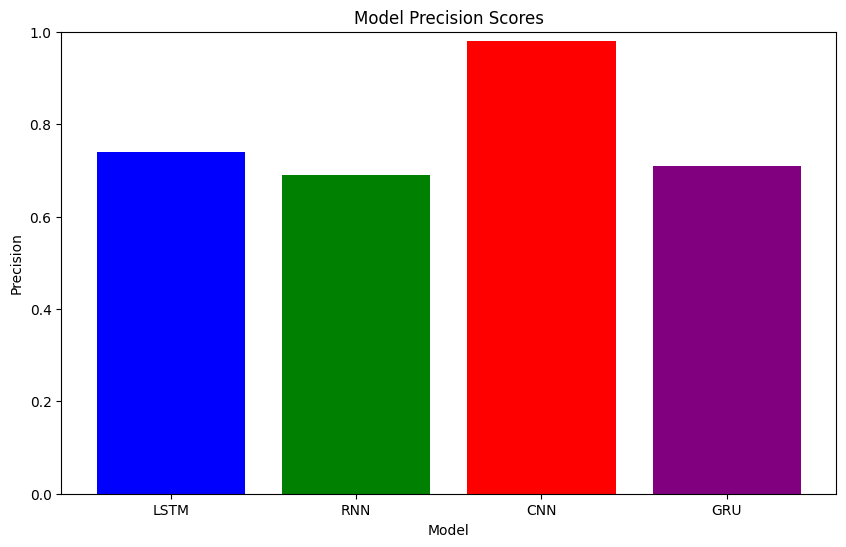

In [ ]:
import matplotlib.pyplot as plt

# List of model names
models = ['LSTM','RNN', 'CNN', 'GRU']

# List of precision scores for each model
precisions = [0.74,0.69,0.98,0.71]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color=['blue', 'green','red', 'purple'])
plt.title('Model Precision Scores')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1.0)  # Adjust the y-axis limits if needed
plt.show()


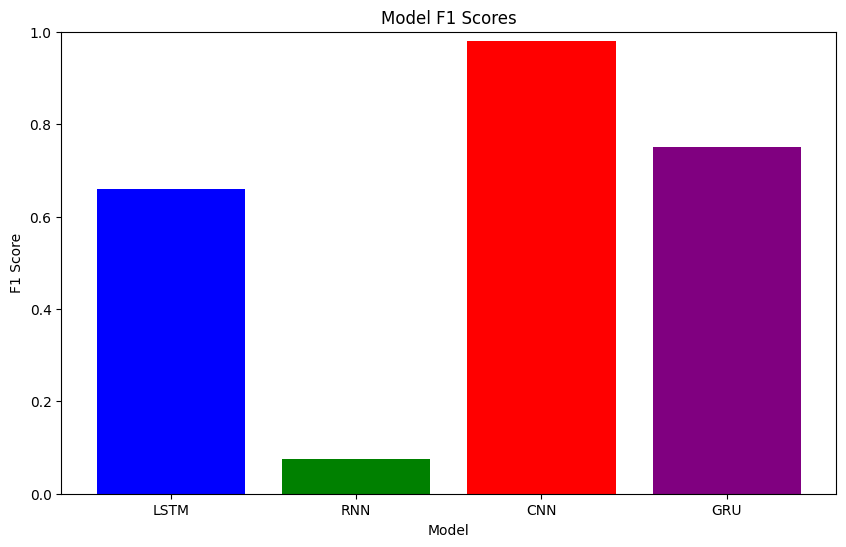

In [ ]:
import matplotlib.pyplot as plt

# List of model names
models = ['LSTM','RNN', 'CNN', 'GRU']

# List of F1_Score scores for each model
F1_Score = [0.66,0.076,0.98,0.75]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, F1_Score, color=['blue', 'green','red', 'purple'])
plt.title('Model F1 Scores')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1.0)  # Adjust the y-axis limits if needed
plt.show()


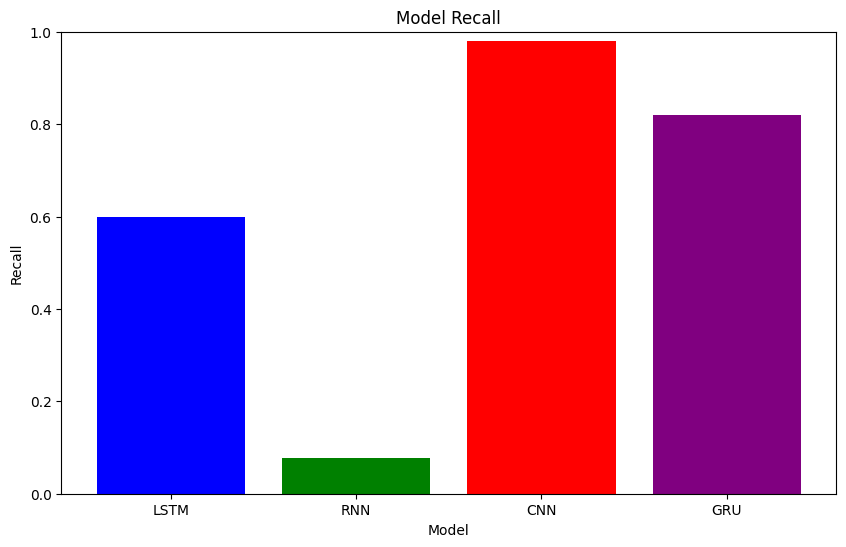

In [ ]:
import matplotlib.pyplot as plt

# List of model names
models = ['LSTM','RNN', 'CNN', 'GRU']

# List of Recall  for each model
Recall = [0.60,0.078,0.981,0.82]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, Recall, color=['blue', 'green','red', 'purple'])
plt.title('Model Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1.0)  # Adjust the y-axis limits if needed
plt.show()


In [ ]:
#GRU Model
# Convert DataFrame X to a NumPy array
X_array = X.values

# Convert Series y to a NumPy array
y_array = y.values

# Define the number of time steps and features
time_steps = X_array.shape[1]  # Number of time steps
num_features = 1  # Number of features per time step

# Define the number of classes (output categories)
num_classes = len(np.unique(y_array))

# Convert labels to one-hot encoding (categorical format)
y_encoded = keras.utils.to_categorical(y_array, num_classes)

# Reshape X to match the input shape expected by GRU
X_reshaped = X_array.reshape(X_array.shape[0], time_steps, num_features)

# Define the GRU model
gru = keras.Sequential()
gru.add(layers.GRU(128, input_shape=(time_steps, num_features)))
gru.add(layers.Dense(num_classes, activation='softmax'))
GRU_pred = gru.predict(X_test)

# Compile the model
gru.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
GRU=model.fit(X_reshaped, y_encoded, epochs=1, batch_size=32)

3421/3421 [==============================] - 163s 48ms/step - loss: 0.6406 - accuracy: 0.8262


In [ ]:
 GRU_pred = gru.predict(X_test)

685/685 [==============================] - 28s 40ms/step


In [ ]:
# Convert GRU_pred to class labels (if it's in one-hot encoding format)
GRU_pred_labels = np.argmax(GRU_pred, axis=1)

# Compute precision for the LSTM model
precision_GRU = precision_score(y_test, GRU_pred_labels, average='weighted')

# Print the precision score
print(f"GRU Precision: {precision_GRU}")

GRU Precision: 0.7118573188588595


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Convert GRU_pred to class labels (if it's in one-hot encoding format)
GRU_pred_labels = np.argmax(GRU_pred, axis=1)

# Compute F1 score for the LSTM model
f1_GRU = f1_score(y_test, GRU_pred_labels, average='weighted')

# Print the F1 score
print(f"GRU F1 Score: {f1_GRU }")

GRU F1 Score: 0.7582513547903935


In [ ]:
# Convert GRU_pred to class labels (if it's in one-hot encoding format)
GRU_pred_labels = np.argmax(GRU_pred, axis=1)

# Compute F1 score for the GRU model
Recall_GRU = recall_score(y_test, GRU_pred_labels, average='weighted')

# Print the F1 score
print(f"GRU Recall Score: {Recall_GRU }")

GRU Recall Score: 0.8264504339881225


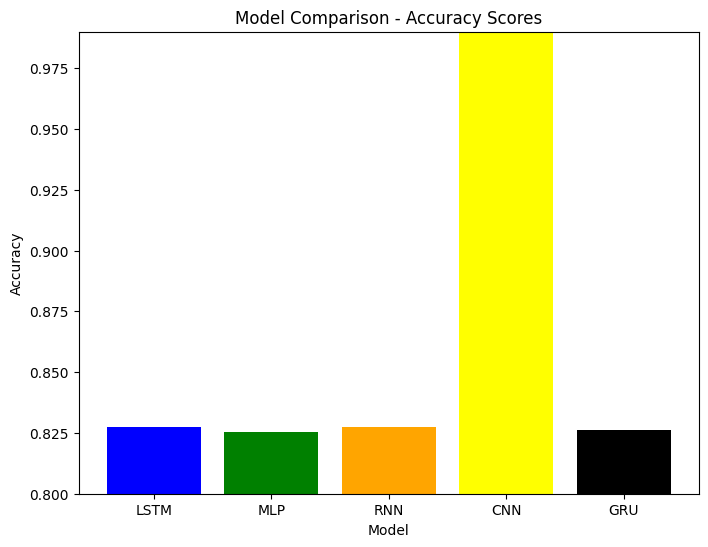

In [ ]:
import matplotlib.pyplot as plt

# Models and their accuracy scores
models = ['LSTM', 'MLP', 'RNN','CNN','GRU']
accuracy_scores = [0.8276, 0.8255, 0.8276,0.99,0.8262]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange','yellow','black'])
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Adjust the y-axis limits to better visualize the bars
plt.ylim(0.8, 0.99)  # Adjust the values based on your actual accuracy scores range

plt.show()
